**KNN With Sklearn**

Our data consists information of 310 patients, of whom 100 are normal, 60 have Disk Hernia and 150 have Spondylolisthesis. There are 6 variables to represent each patient. Dataset consists 2 files, first one has 3 categories I have written above, and the second file has 2 categories which are Normal and Abnormal(sum of Disk Hernia and Spondylolisthesis).


We will try to fit a KNN algorithm to the data in order to predict to which category a given patient belongs. We will work on each file separately.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df2 = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')

# KNN with the 2-Categories Dataset

In [3]:
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df1=df1.rename(columns={"class": "type"})

In [6]:
df1.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'type'],
      dtype='object')

In [7]:
df1.type.unique()

array(['Abnormal', 'Normal'], dtype=object)

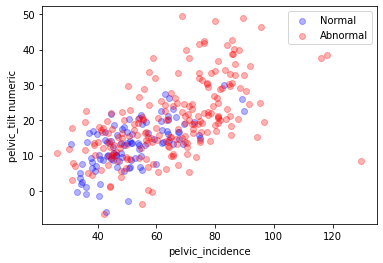

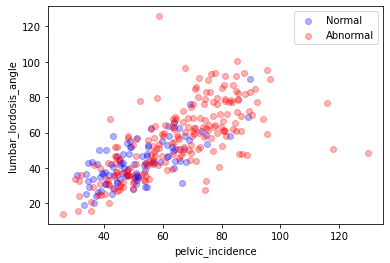

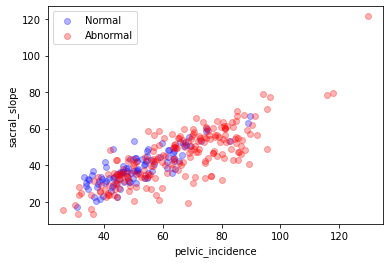

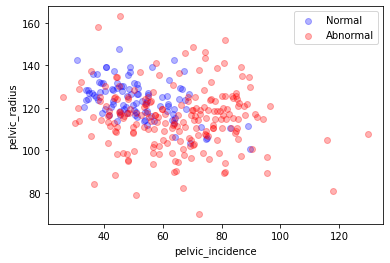

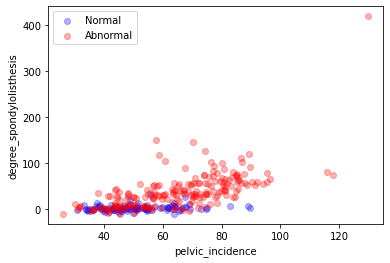

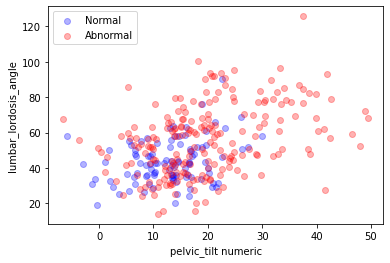

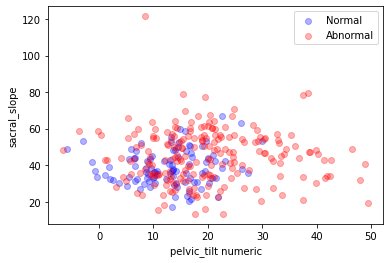

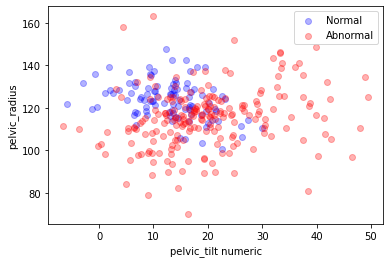

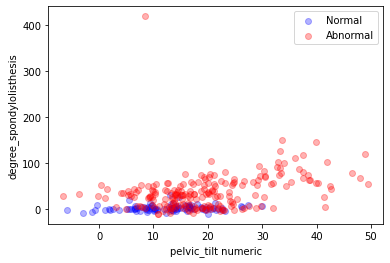

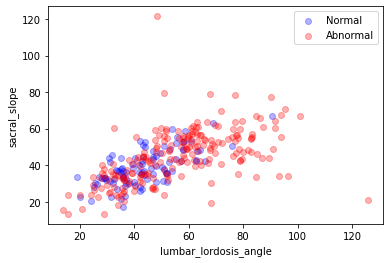

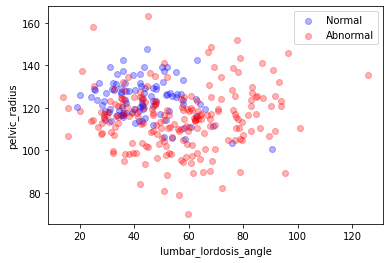

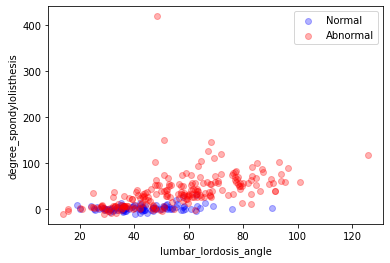

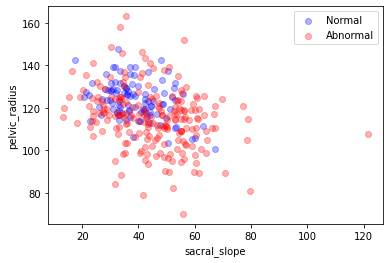

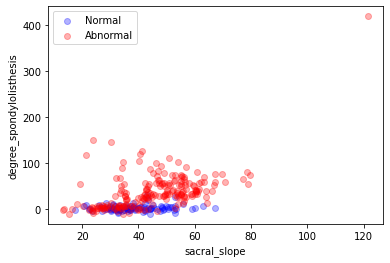

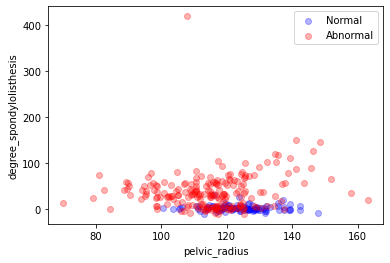

In [8]:
# visualisation

Normal = df1[df1["type"] == 'Normal' ]
Abnormal = df1[df1["type"] == 'Abnormal' ]

for x in range(6):
    for y in range(x+1,6):
        plt.scatter(Normal.iloc[:,x], Normal.iloc[:,y], color='b', label='Normal', alpha=0.3)
        plt.scatter(Abnormal.iloc[:,x], Abnormal.iloc[:,y], color='r', label='Abnormal', alpha=0.3)
        plt.legend()
        plt.xlabel(df1.columns[x])
        plt.ylabel(df1.columns[y])
        plt.show()

Some plots suggest that KNN can be used on this dataset. Let's do it.

We should normalize the data first, in order to prevent large numbers to outnumber smaller ones.

In [9]:
y=df1.type.values
x=df1.drop("type", axis=1)

# normalization
x=(x-x.min())/(x.max()-x.min())


In [10]:
x.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's generate our train and test datasets.

In [11]:
#train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

Now let's use KNN algorithm on the data and see how well it performs.

In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
print('Score :', knn_model.score(x_test,y_test))

Score : 0.7526881720430108


75% accuracy seems like a bit low. Let's optimize the number of neighbors to increase accuracy.

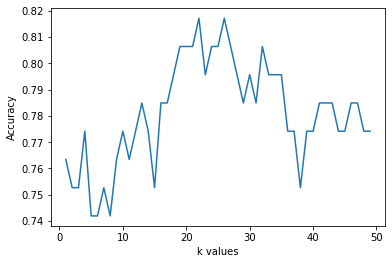

In [13]:
score_list=[]
for each in range (1,50):
    knn_model=KNeighborsClassifier(n_neighbors=each)
    knn_model.fit(x_train,y_train)
    score_list.append(knn_model.score(x_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.show()

In [14]:
print(score_list[20:30])

[0.8064516129032258, 0.8172043010752689, 0.7956989247311828, 0.8064516129032258, 0.8064516129032258, 0.8172043010752689, 0.8064516129032258, 0.7956989247311828, 0.7849462365591398, 0.7956989247311828]


We have the highest scores when number of neighbors are 22 and 26, which is 81.72%.

# KNN with the 3-Categories Dataset

In [15]:
df2=df2.rename(columns={"class": "type"})

In [16]:
df2.type.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [17]:
y=df2.type.values
x=df2.drop("type", axis=1)

In [18]:
# Normalization

x=(x-x.min())/(x.max()-x.min())

In [19]:
x.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# train-test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [21]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))

0.6989247311827957


Let's optimize the number of neighbors.

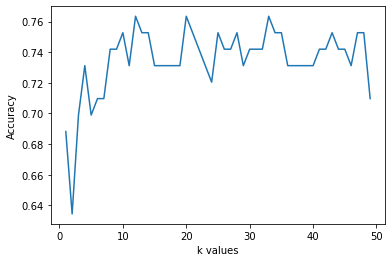

In [22]:
score_list=[]
for each in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

plt.plot(range(1,50), score_list)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.show()

In [23]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7634408602150538

We have the highest score when k=12, which is 76.34%.